In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv(r'C:\Users\Maitri Chitania\OneDrive\Desktop\CODE UNNATI\crop_recommendation.csv')

In [3]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [11]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [14]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [15]:
# Prints the basic information about our dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [16]:
# Prints the descriptive summary of the dataframe.
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [17]:
# Print datatype of all columns
print(df.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"])


<Axes: >

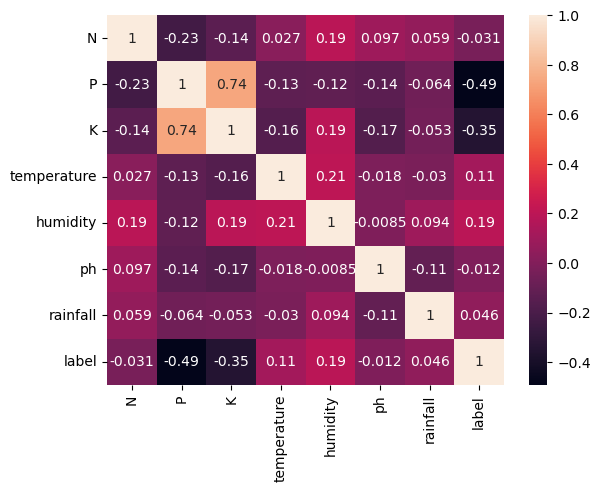

In [27]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target variable

In [36]:
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # Features
target = df['label']  # Target variable

# Check if X and Y are properly assigned
print(features.shape, target.shape)  


(2200, 7) (2200,)


In [37]:
#initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [38]:
print(features.head())  # Check the first few rows
print(target.head())  # Check the first few target values


    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340
0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int64


In [39]:
#splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTree's Accuracy is:", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTree's Accuracy is: 90.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.74      0.93      0.83        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00     

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
#cross validation score (Decision Tree) 
score =cross_val_score(DecisionTree, features, target,cv=5)

In [43]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [44]:
import pickle
#dump the trained Naive Bayes Classifier with pickle
DT_pkl_filename = r"C:\Users\Maitri Chitania\OneDrive\Desktop\CODE UNNATI\Models\DecisionTree.pkl"
#open the file to save file file as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
#close the pickle instances
DT_Model_pkl.close()

###  Guassian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest,predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bates's Accuracy is:", x)
print(classification_report(Ytest,predicted_values))

Naive Bates's Accuracy is: 0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00   

In [46]:
#cross validation score
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

#### Saving trained Guassian Naive Bayes Model

In [47]:
import pickle
#dump the trained Naive Bayes classifier with pickle
NB_Model_pkl = r"C:\Users\Maitri Chitania\OneDrive\Desktop\CODE UNNATI\Models\NBClassifier.pkl"
#open the file to save as pkl file
with open(NB_Model_pkl, 'wb') as file:
    pickle.dump(NaiveBayes, file)


## Support Vector Machine (SVM)

In [48]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.83      0.89      0.86        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.0

In [49]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score


array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [50]:
#saving the svm model
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = r"C:\Users\Maitri Chitania\OneDrive\Desktop\CODE UNNATI\Models\NBClassifier.pkl"
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append('Logistic Regression')
print("Logistic Regression's Accuracy is:", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is: 0.9522727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.86      0.75      0.80        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.90      0.88        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.88      1.00      0.94        23
          11       0.90      0.86      0.88        21
          12       0.96      1.00      0.98        26
          13       0.84      0.84      0.84        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00    

#### Saved Logistic Regression Model

In [52]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [53]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = r"C:\Users\Maitri Chitania\OneDrive\Desktop\CODE UNNATI\Models\LogisticRegression.pkl"
# Open the file to save as pkl file
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain, Ytrain)  # No encoding needed

predicted_values = RF.predict(Xtest)
x = accuracy_score(Ytest, predicted_values)

acc.append(x)
model.append('RF')

print("RF's Accuracy is: ", x)
print(classification_report(Ytest, predicted_values))



RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00 

In [55]:
# Create a mapping of numbers to actual crop names (assuming df['label'] originally had names)
label_mapping = {i: name for i, name in enumerate(df['label'].unique())}

# Example: If 5 → 'coffee'
print(label_mapping)



{0: 20, 1: 11, 2: 3, 3: 9, 4: 18, 5: 13, 6: 14, 7: 2, 8: 10, 9: 19, 10: 1, 11: 12, 12: 7, 13: 21, 14: 15, 15: 0, 16: 16, 17: 17, 18: 4, 19: 6, 20: 8, 21: 5}


In [56]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
predicted_label = RF.predict(data)  # This will return a number

# Convert back to crop name using our stored mapping
prediction = label_mapping[predicted_label[0]]
print("Predicted Crop:", prediction)  # Now should print 'coffee'


Predicted Crop: 13


In [57]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [58]:
print("Unique values in Ytrain:", Ytrain.unique())  # If numbers → already encoded
print("Data type of Ytrain:", type(Ytrain.iloc[0]))  # Should show <class 'int'> if encoded


Unique values in Ytrain: [ 6 14  9  0 17  8 18 11 15  4  5 12  2  7  3 16 19 10 13 20  1 21]
Data type of Ytrain: <class 'numpy.int64'>


### Saving the Trained Random Forest Model

In [59]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = r"C:\Users\Maitri Chitania\OneDrive\Desktop\CODE UNNATI\Models\RandomForest.pkl"
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## XG Boost

In [60]:
!pip install xgboost


In [61]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [62]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99545455, 0.98863636, 0.99545455, 0.99545455, 0.98863636])

### Saving the XGBooost Model

In [63]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = r"C:\Users\Maitri Chitania\OneDrive\Desktop\CODE UNNATI\Models\XGBoost.pkl"
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

#### Accuracy Comparision

In [64]:
from sklearn.metrics import accuracy_score

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
dt_pred = DT.predict(Xtest)

acc.append(accuracy_score(Ytest, dt_pred))
model.append('DecisionTree')

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(Xtrain, Ytrain)
nb_pred = NB.predict(Xtest)

acc.append(accuracy_score(Ytest, nb_pred))
model.append('NaiveBayes')

# XGBoost
import xgboost as xgb

XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain)
xb_pred = XB.predict(Xtest)

acc.append(accuracy_score(Ytest, xb_pred))
model.append('XGBoost')

print(model)
print(acc)


['Decision Tree', 'Naive Bayes', 'SVM', 'RF', 'XGBoost', 'DecisionTree', 'NaiveBayes', 'XGBoost']
[0.9, 0.990909090909091, 0.9795454545454545, 'Logistic Regression', 0.990909090909091, 0.990909090909091, 0.9840909090909091, 0.990909090909091, 0.990909090909091]


In [65]:
print(Xtrain.isnull().sum())  # Check for missing values in features
print(Ytrain.isnull().sum())  # Check for missing values in target


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64
0


In [66]:
print(len(Xtrain), len(Ytrain))


1760 1760


In [67]:
print(f"X: {type(X)}")
print(f"Y: {type(Y)}")
print(f"Xtrain: {type(Xtrain)}, Ytrain: {type(Ytrain)}")




X: <class 'pandas.core.frame.DataFrame'>
Y: <class 'pandas.core.series.Series'>
Xtrain: <class 'pandas.core.frame.DataFrame'>, Ytrain: <class 'pandas.core.series.Series'>


In [68]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Initialize empty lists
acc = []
model = []

# 1️⃣ Random Forest
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain, Ytrain)
rf_pred = RF.predict(Xtest)
acc.append(accuracy_score(Ytest, rf_pred))
model.append('Random Forest')

# 2️⃣ Decision Tree
DT = DecisionTreeClassifier()
DT.fit(Xtrain, Ytrain)
dt_pred = DT.predict(Xtest)
acc.append(accuracy_score(Ytest, dt_pred))
model.append('Decision Tree')

# 3️⃣ Naive Bayes
NB = GaussianNB()
NB.fit(Xtrain, Ytrain)
nb_pred = NB.predict(Xtest)
acc.append(accuracy_score(Ytest, nb_pred))
model.append('Naive Bayes')

# 4️⃣ XGBoost
XB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XB.fit(Xtrain, Ytrain)
xb_pred = XB.predict(Xtest)
acc.append(accuracy_score(Ytest, xb_pred))
model.append('XGBoost')

# 5️⃣ Support Vector Machine (SVM)
SVM = SVC(kernel='linear', random_state=0)
SVM.fit(Xtrain, Ytrain)
svm_pred = SVM.predict(Xtest)
acc.append(accuracy_score(Ytest, svm_pred))
model.append('SVM')

# 6️⃣ Logistic Regression
LR = LogisticRegression(max_iter=1000, random_state=0)
LR.fit(Xtrain, Ytrain)
lr_pred = LR.predict(Xtest)
acc.append(accuracy_score(Ytest, lr_pred))
model.append('Logistic Regression')

# Print results
for i in range(len(model)):
    print(f"{model[i]} Accuracy: {acc[i]:.4f}")


Random Forest Accuracy: 0.9909
Decision Tree Accuracy: 0.9727
Naive Bayes Accuracy: 0.9909
XGBoost Accuracy: 0.9909
SVM Accuracy: 0.9773
Logistic Regression Accuracy: 0.9682


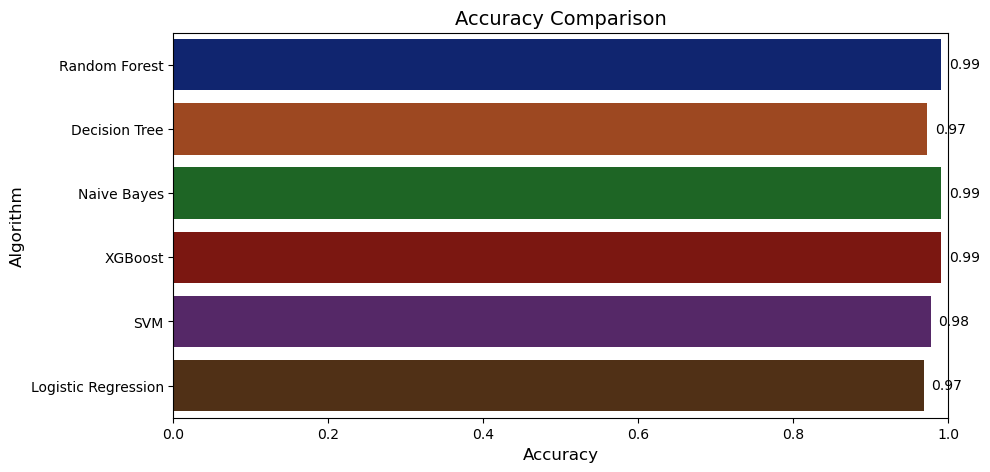

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison', fontsize=14)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Algorithm', fontsize=12)

sns.barplot(x=acc, y=model, palette='dark')

# Display accuracy values on bars
for index, value in enumerate(acc):
    plt.text(value + 0.01, index, f"{value:.2f}", fontsize=10, va='center')

plt.xlim(0, 1)  # Ensure accuracy scale is between 0 and 1
plt.show()


In [70]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Random Forest --> 0.990909090909091
Decision Tree --> 0.9727272727272728
Naive Bayes --> 0.990909090909091
XGBoost --> 0.990909090909091
SVM --> 0.9772727272727273
Logistic Regression --> 0.9681818181818181


## Making a Prediction

In [71]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

[5]


In [74]:
# Define the crop dictionary
crop_dict = {
    0: "rice",
    1: "maize",
    2: "jute",
    3: "cotton",
    4: "coconut",
    5: "papaya",
    6: "orange",
    7: "apple",
    8: "muskmelon",
    9: "watermelon",
    10: "grapes",
    11: "mango",
    12: "banana",
    13: "pomegranate",
    14: "lentil",
    15: "blackgram",
    16: "mungbean",
    17: "mothbeans",
    18: "pigeonpeas",
    19: "kidneybeans",
    20: "chickpea",
    21: "coffee"
}

In [75]:
# Function to get crop name
def get_crop_name(prediction):
    return crop_dict.get(prediction, "Unknown Crop")

# Example data
data = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])

# Make prediction (Assuming RF is your trained Random Forest model)
prediction = RF.predict(data)

# Extract the first value and convert to an integer
predicted_class = int(prediction[0])  # Ensure it's an integer

# Convert numeric prediction to crop name
crop_name = get_crop_name(predicted_class)

print("Predicted Crop:", crop_name)

Predicted Crop: papaya
